* Student ID: **46210288**
* Student name: **Le Nga Ho**
* Portfolio Github repo URL: https://github.com/MQCOMP6200/portfolio-s1-2021-lengaho

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings; warnings.simplefilter('ignore')

# Analysis of Appliances Energy Consumption Data

## Outline
### Part 1: Plotting
1. Appliances energy consumption measurement: *(A) for the whole period; (B) for the first week of data*
2. Appliances energy consumption distribution: *Histogram & boxplot*
3. Pairs plot: *Relationship between the energy consumption of appliances with other variables*
4. Heatmap: *Hourly energy consumption of appliances for four consecutive weeks*

### Part 2: Modelling & Evaluation
1. Regression model: 
    * Multiple linear regression - evaluated via RMSE, R2, MAE, MAPE
    * Residuals vs. Appliances (Wh) for lm model scatterplot
2. RMSE using the RFE algorithm

## Getting data

In [2]:
train = pd.read_csv('data/training.csv')
print(train.shape)
train.head()

(14803, 32)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [3]:
test = pd.read_csv('data/testing.csv')
print(test.shape)
test.head()

(4932, 32)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [4]:
# Merge train & test sets to get the full dataset
full = pd.concat([train, test], ignore_index = True)
print(full.shape)

(19735, 32)


In [5]:
# Check the summary statistics
full.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,42907.129465
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,24940.020831
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,21600.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,43200.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,64200.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,85800.000000


In [6]:
# Check the names of all columns
full.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [7]:
# Convert datetime from object to datetime64[ns]
full.date = pd.to_datetime(full.date)
full.date.dtype

dtype('<M8[ns]')

## Part 1: Plotting
### Figure 1: Appliances energy consumption measurement

1. for the whole period
2. for first week of data

In [8]:
# Slice the first week dataframe
start = full.date.searchsorted("2016-01-11")
end = full.date.searchsorted("2016-01-19")
firstweek = full.iloc[start:end]
firstweek.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
776,2016-01-18 23:00:00,60,20,20.666667,38.590000,19.625000,38.817500,20.323333,41.230000,20.666667,...,756.6,88.000000,1.0,64.000000,-6.60,9.405944,9.405944,82800,Weekday,Monday
777,2016-01-18 23:10:00,50,10,20.600000,38.663333,19.533333,38.966667,20.290000,41.026667,20.600000,...,756.6,87.833333,1.0,64.166667,-6.55,20.385743,20.385743,83400,Weekday,Monday
778,2016-01-18 23:30:00,40,20,20.533333,38.863333,19.390000,39.090000,20.200000,40.700000,20.500000,...,756.6,87.500000,1.0,64.500000,-6.45,15.446453,15.446453,84600,Weekday,Monday
779,2016-01-18 23:40:00,30,10,20.500000,38.933333,19.356667,39.156667,20.133333,40.626667,20.390000,...,756.6,87.333333,1.0,64.666667,-6.40,24.048282,24.048282,85200,Weekday,Monday
780,2016-01-18 23:50:00,40,10,20.500000,39.060000,19.290000,39.290000,20.066667,40.466667,20.356667,...,756.6,87.166667,1.0,64.833333,-6.35,46.969740,46.969740,85800,Weekday,Monday


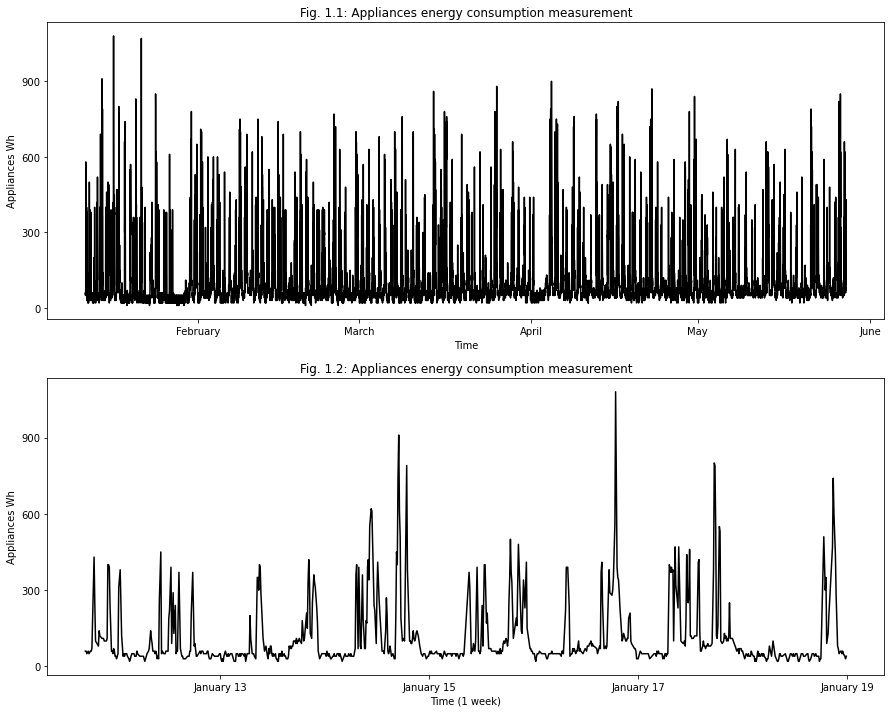

In [9]:
# Plot the appliances energy consumption measurement for (A) the whole period and (B) the first week of data
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,12))

sns.lineplot(data=full, x='date', y='Appliances', color='k', ax=ax1)
sns.lineplot(data=firstweek, x='date', y='Appliances', color='k', ax=ax2)

ax1.set(xlabel="Time", ylabel="Appliances Wh", title="Fig. 1.1: Appliances energy consumption measurement",
       yticks=np.arange(0, 1200, 300))
ax1.xaxis.set_major_locator(MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter("%B"))

ax2.set(xlabel="Time (1 week)", ylabel="Appliances Wh", title="Fig. 1.2: Appliances energy consumption measurement",
       yticks=np.arange(0, 1200, 300))
ax2.xaxis.set_major_locator(DayLocator(range(11, 20, 2)))
ax2.xaxis.set_major_formatter(DateFormatter("%B %d"))

plt.show()

**Comment:**
* The first figure displays the energy consumption for the whole time span of 137 days while the second one captures the first week of the data set.
* Both figures show a high variability of energy use among different hours and days.

### Figure 2: Appliances energy consumption distribution

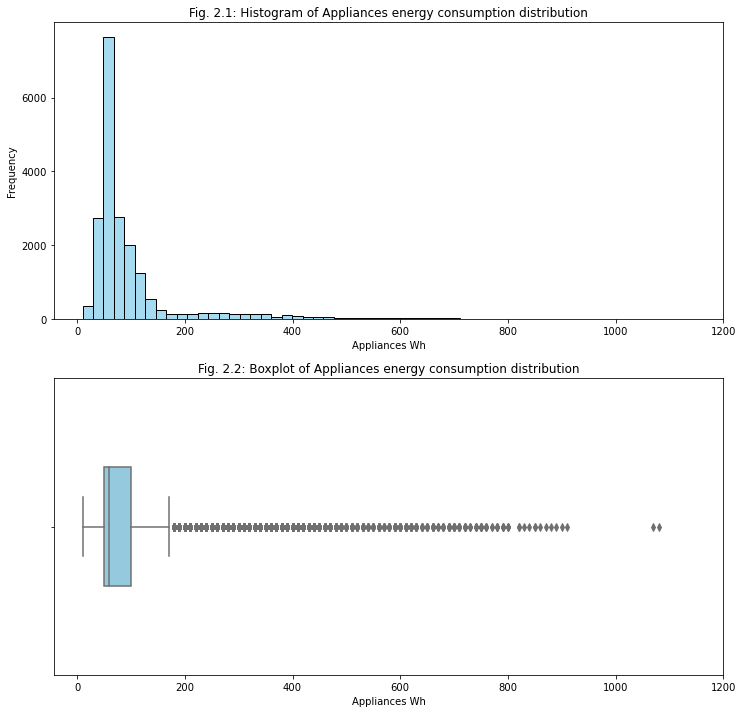

In [10]:
# Plot the appliances energy consumption distribution:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=False, figsize=(12,12))

sns.histplot(data=full, x="Appliances", color="skyblue", bins=55, ax=ax1)
sns.boxplot(data=full, x="Appliances", color="skyblue", width=0.4, ax=ax2)

ax1.set(xlabel='Appliances Wh', xticks=np.arange(0, 1400, 200), 
        ylabel='Frequency', yticks=np.arange(0, 8000, 2000), 
        title='Fig. 2.1: Histogram of Appliances energy consumption distribution')
ax2.set(xlabel='Appliances Wh', xticks=np.arange(0, 1400, 200),
        title='Fig. 2.2: Boxplot of Appliances energy consumption distribution')

plt.show()

**Comments**
* The histogram indicates that the energy consumption distribution is unimodal and highly right-skewed (long-tailed). 
* The boxplot also shows the same skewness along with several outliers outside the upper whisker. 
* The furthest outliers (or the maximum value) is 1080Wh.
* The median has a value of 60Wh whereas the lower whisker (min) is 10Wh and the upper whisker is 170Wh (refer to Candanedo et al. (2017) & the summary statistic of Appliances data below)

In [11]:
# The median & IQR range
full['Appliances'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

### Figure 3: Pairs plot
Relationship between the energy consumption of appliances with:
1. Lights, T1, RH1, T2, RH2, T3 & RH3 (Figure 9 from the paper)
2. T4, RH4, T5, RH5, T6 & RH6 (Appendix A from the paper)
3. T7, RH7, T8, RH8, T9 & RH9 (Appendix B from the paper)
4. T_out, Pressure, RH_out, Windspeed, Visibility, TDewpoint, NSM & T6 (Appendix C from the paper)

In [12]:
# Define Pearson correlation function for pairplot
from scipy.stats import pearsonr
def corr(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('{:.2f}'.format(r), xy=(0.5,0.45), size = 30, xycoords='axes fraction', ha='center')

In [13]:
# Define a pairs plot function
def pplot(pair): 
    g = sns.PairGrid(pair, diag_sharey=False, aspect=1)
    g.map_diag(sns.distplot, color="cyan", kde_kws={'color': 'black'})
    g.map_lower(sns.regplot, color="black", line_kws={'color': 'red'})
    g.map_upper(corr)

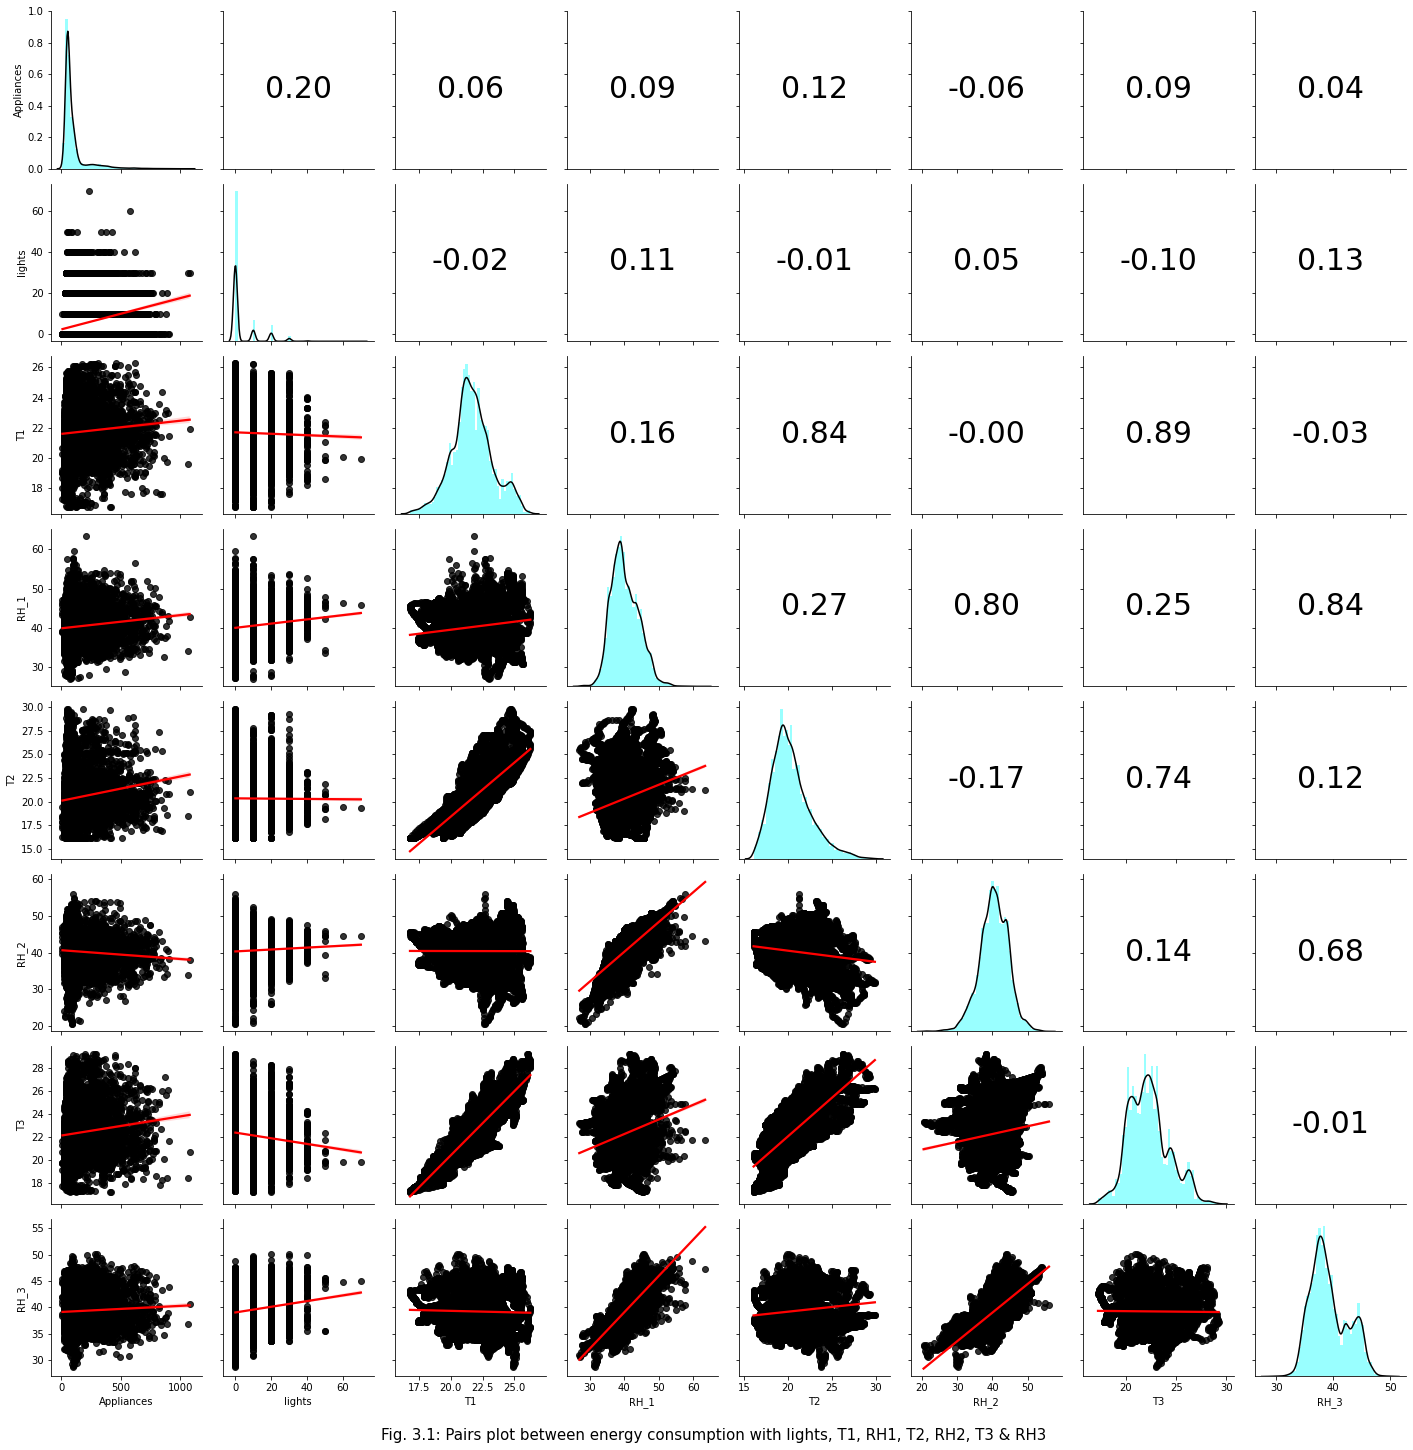

In [14]:
# Plot the pairs plot (Figure 9)
pair1 = full[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]

pplot(pair1)
plt.suptitle('Fig. 3.1: Pairs plot between energy consumption with lights, T1, RH1, T2, RH2, T3 & RH3', size=15, y=0)
plt.show()

# time execution ~ 26s

**Comment:**
* T & RH ~ temperature & humidity; T1 & RH1 ~ the kitchen conditions; T2 & RH2 ~ the living room conditions; T3 & RH3 ~ the laundry room conditions.
* There is a positive correlation (0.20) between the energy consumption and lights.
* The second highest correlation (0.12) is between energy use and temperatures in the living room (T2).
* The indoor temperatures (T1, T2, T3) are highly correlated with each other. This was explained by the ventilation minimising temperature differences between rooms (Candanedo et al. 2017).
* The same strong correlation goes for humidity levels inside the house. 

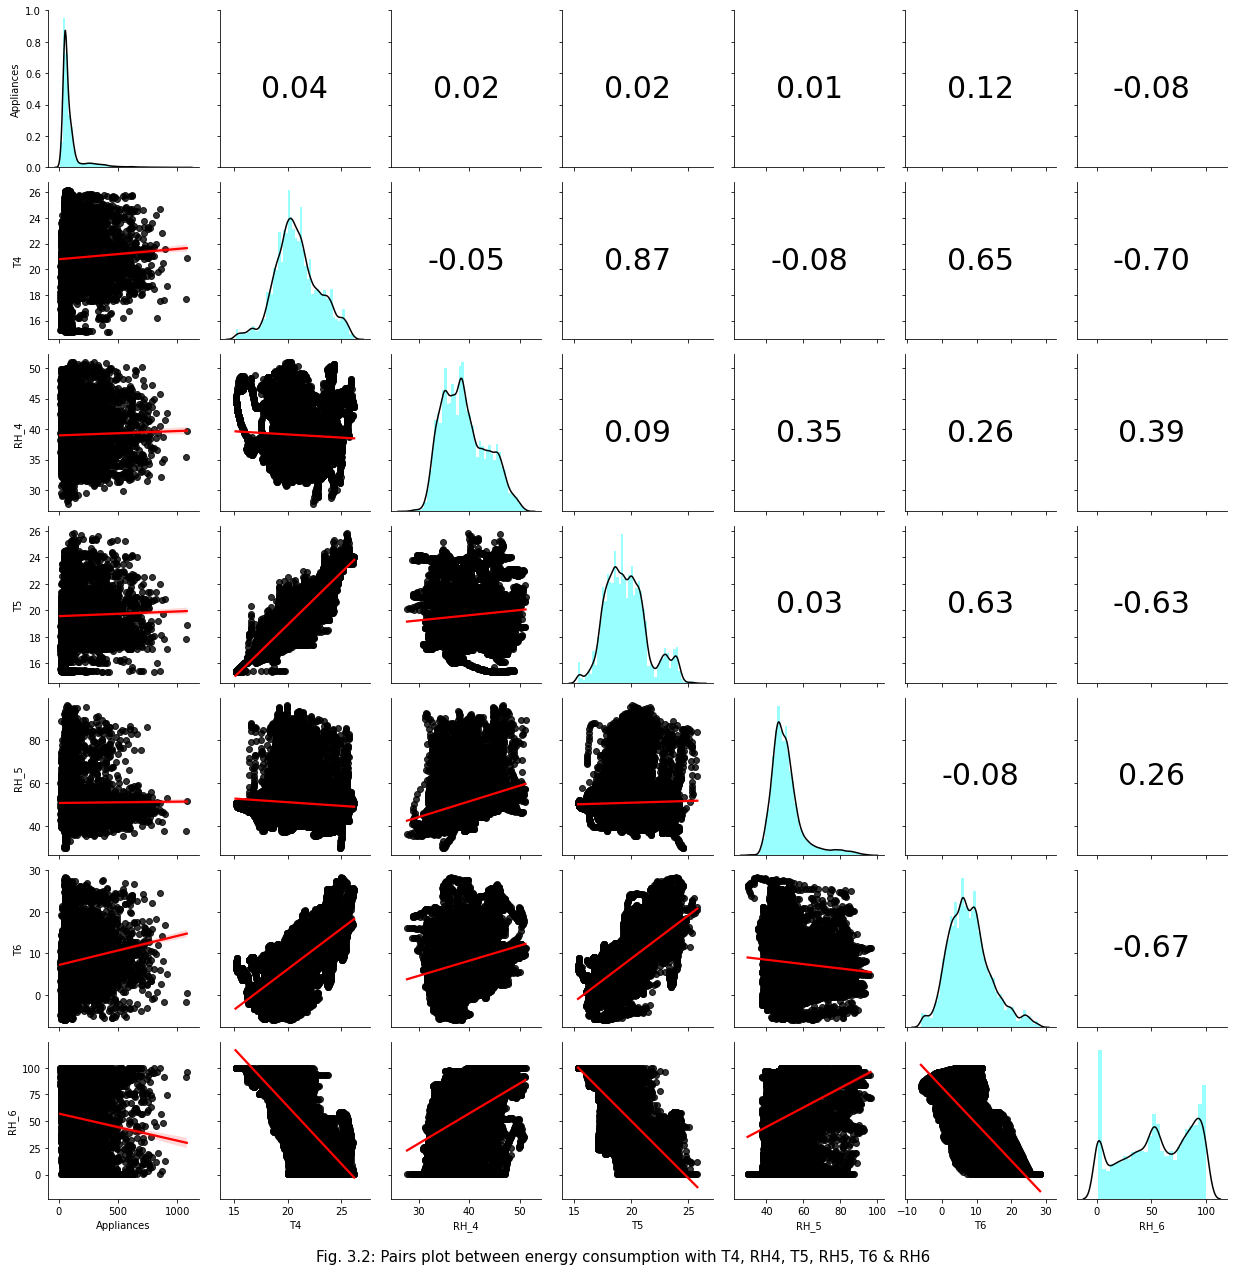

In [15]:
# Plot the pairs plot (Appendix A)
pair2 = full[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6']]

pplot(pair2)
plt.suptitle('Fig. 3.2: Pairs plot between energy consumption with T4, RH4, T5, RH5, T6 & RH6', size=15, y=0)
plt.show()

# time execution ~ 20s

**Comment:**
* T4 & RH4 ~ the office conditions; T5 & RH5 ~ the bathroom conditions; T6 & RH6 ~ the outdoor conditions.
* In this plot, appliances have the highest positive correlation (0.12) with outdoor temperature (T6) and a negative correlation (-0.08) with outdoor humidity (RH6).
* The indoor temperatures (T5 & T6) are highly correlated as expected.
* Interestingly, the outdoor humidity (RH6) shows a strong negative relationship with both indoor and outdoor temperatures (T4, T5, T6).

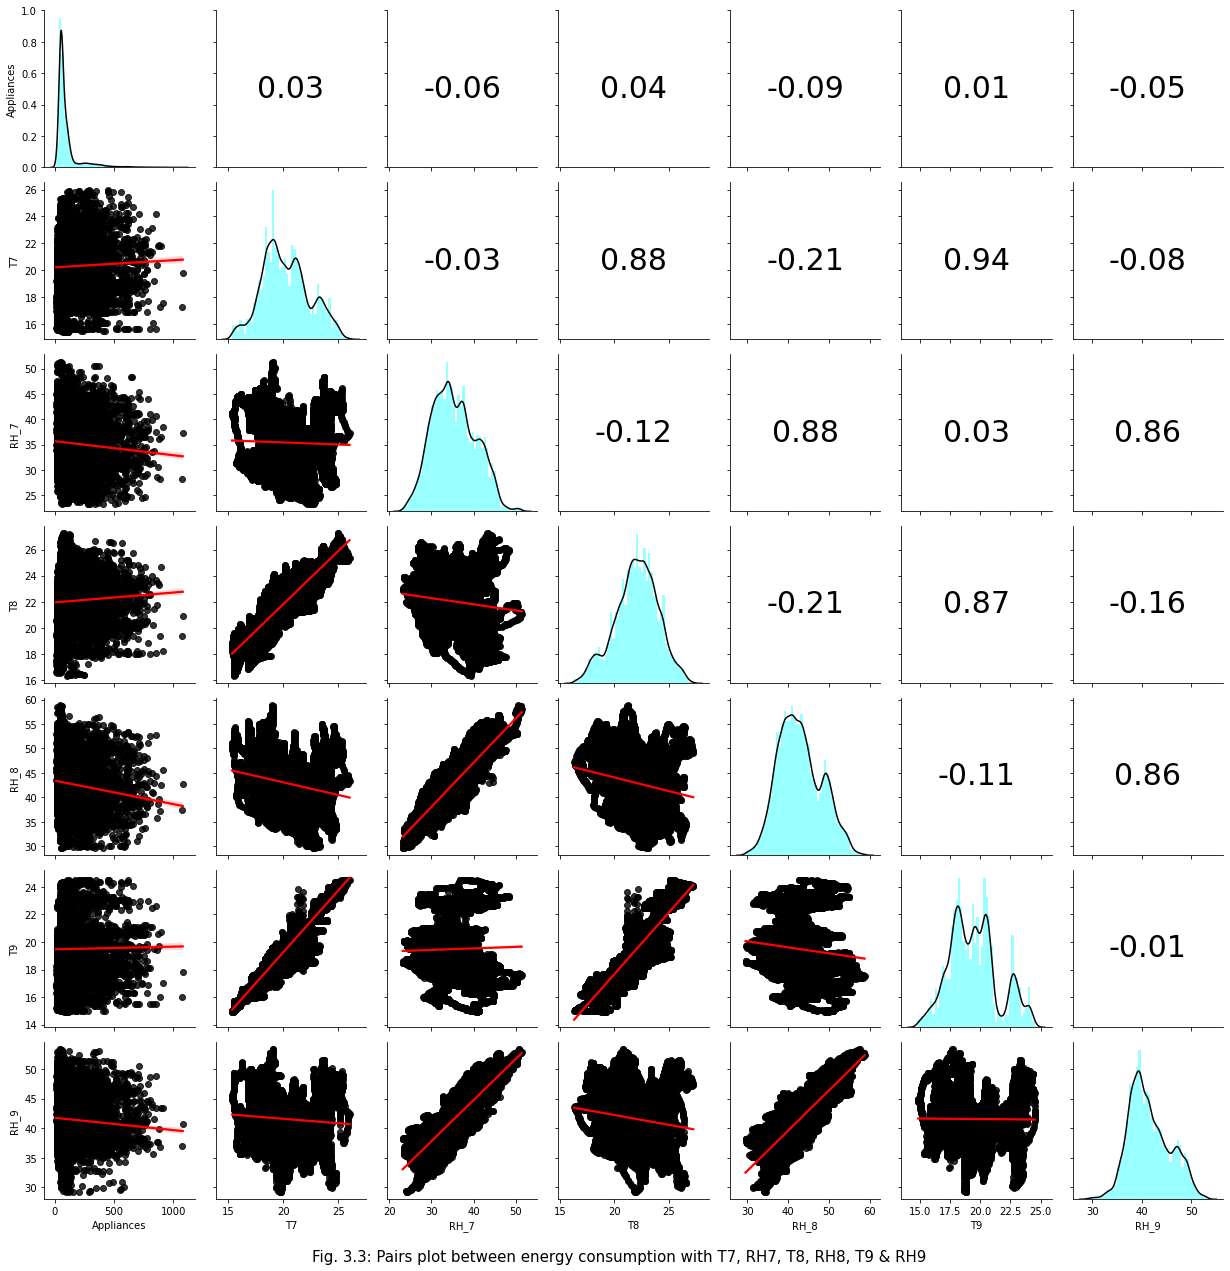

In [16]:
# Plot the pairs plot (Appendix B)
pair3 = full[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']]

pplot(pair3)
plt.suptitle('Fig. 3.3: Pairs plot between energy consumption with T7, RH7, T8, RH8, T9 & RH9', size=15, y=0)
plt.show()

# time execution ~ 21s

**Comment:**
* T7 & RH7 ~ the ironing room conditions; T8 & RH8 ~ room 2; T9 & RH9 ~ the main room.
* The energy consumption by appliances shows slightly positive correlations with room temperatures (T7, T8, T9) while having negative correlations with humidity levels (RH7, RH8, RH9).
* Similar to other graphs, indoor temperatures (T7, T8, T9) are highly correlated with each other.
* The same strong positive relationship is found between indoor humidity (RH7, RH8, RH9).

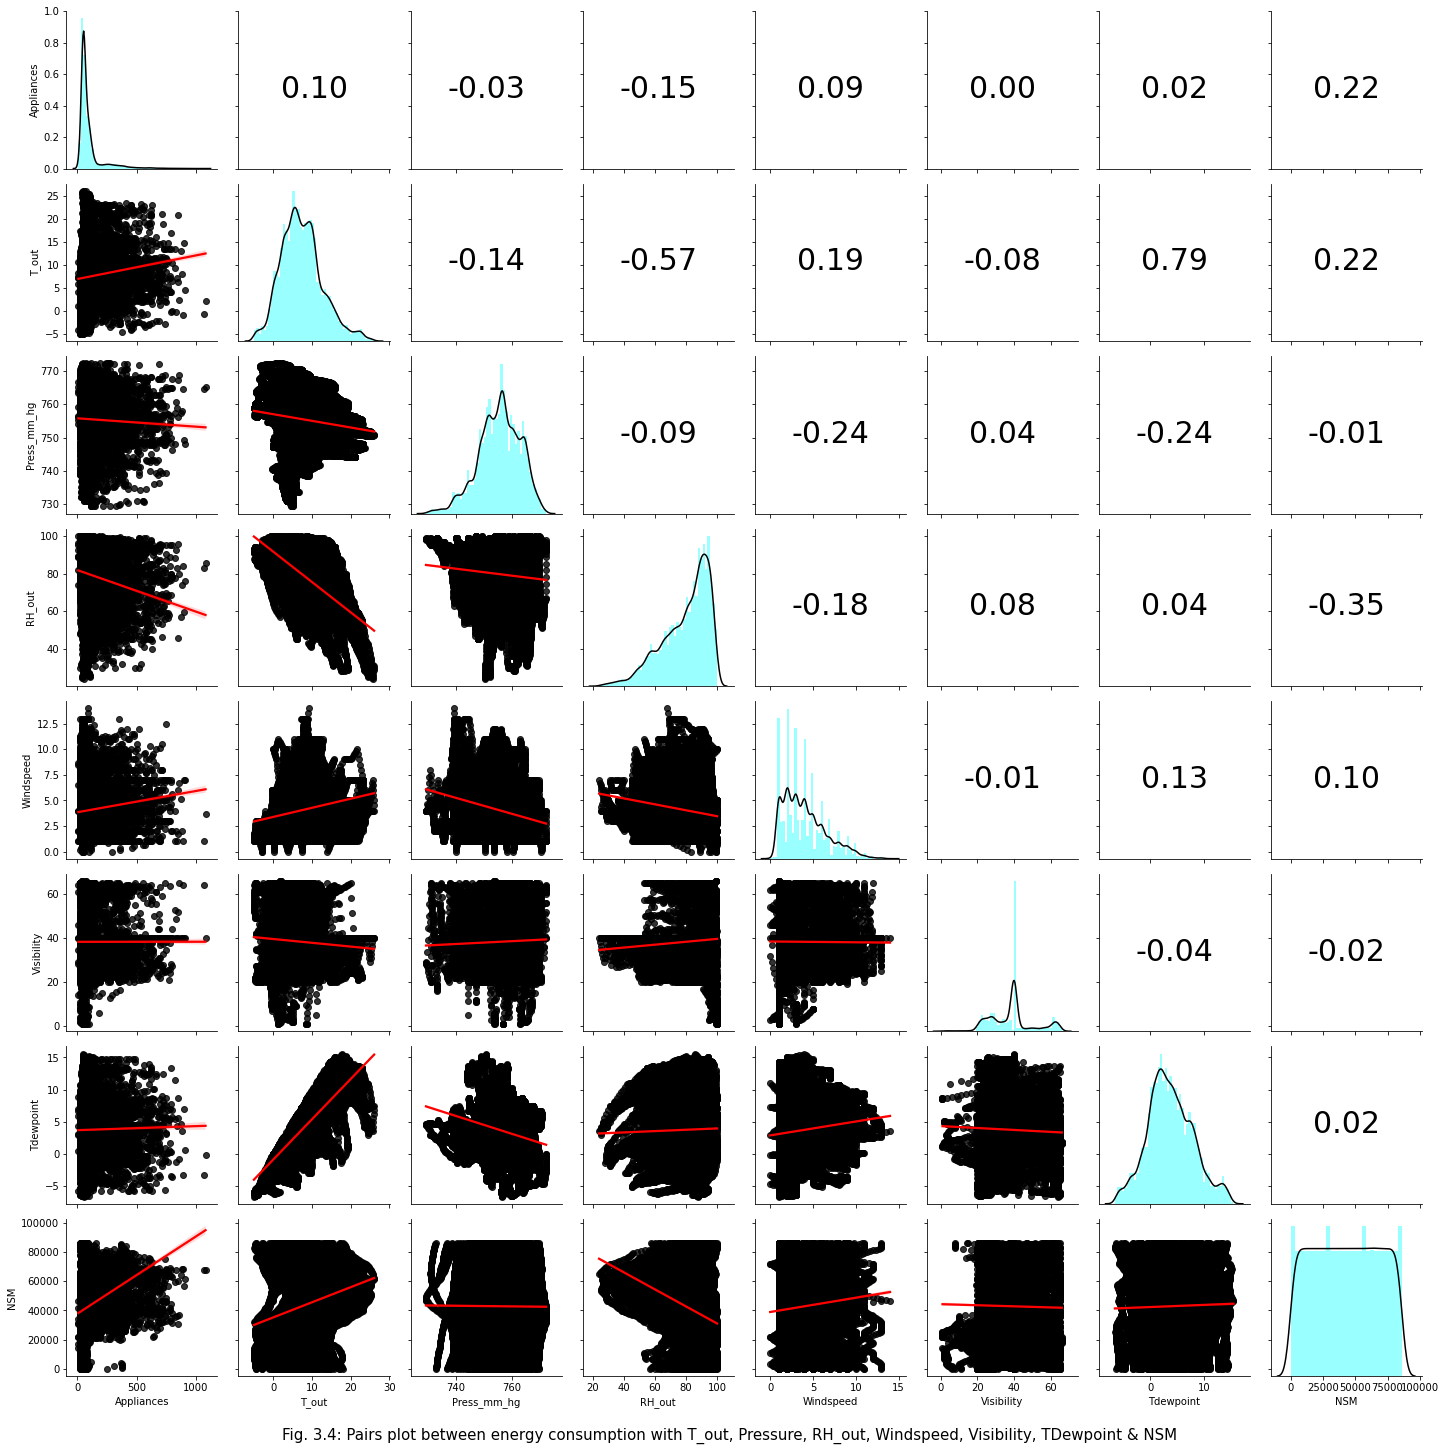

In [17]:
# Plot the pairs plot (Appendix C)
pair4 = full[['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM']]

pplot(pair4)
plt.suptitle('Fig. 3.4: Pairs plot between energy consumption with T_out, Pressure, RH_out, Windspeed, Visibility, TDewpoint & NSM', size=15, y=0)
plt.show()

# time execution ~ 28s

**Comment:**
* T_out & RH_out ~ outside (weather station) conditions; NSM ~ number of seconds from midnight
* In this graph, the energy usage by appliances has the highest positive correlations with NSM (0.22), then followed by outdoor temperature (T_out ~ 0.10) and wind speed (0.09).
* On the other hand, there is a negative correlation of -0.15 between appliances with outdoor humidity (RH_out) and of -0.03 with pressure. 
* In addition, the pressure is found to be negatively correlated (-0.23) with wind speed. This means the lower the pressure is, the higher the wind speed will be.

### Figure 4: Heat map
Hourly energy consumption of appliances for four consecutive weeks

In [18]:
# Split date & time
full['Hour'] = pd.to_datetime(full['date']).dt.hour
full['Week_of_year'] = pd.to_datetime(full['date']).dt.isocalendar().week
full.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,Hour,Week_of_year
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday,17,2
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday,17,2
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday,17,2
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday,17,2
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday,17,2


In [19]:
# Define the order to sort the day by
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
print(sorterIndex)

# Map the day_of_week to the required sort index
full['Day_id'] = full['Day_of_week']
full['Day_id'] = full['Day_id'].map(sorterIndex)

# Sort by Day_id
full.sort_values('Day_id', inplace=True)

full.head()

{'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,Hour,Week_of_year,Day_id
5136,2016-02-28 00:00:00,50,0,21.290000,35.29,19.533333,34.900000,20.89,35.966667,19.29,...,22.0,-3.300000,23.221792,23.221792,0,Weekend,Sunday,0,8,0
7477,2016-03-20 14:20:00,180,0,22.066667,36.59,20.600000,37.430000,22.89,36.730000,19.70,...,40.0,2.433333,20.612221,20.612221,51600,Weekend,Sunday,14,11,0
7478,2016-03-20 14:30:00,70,0,22.100000,36.40,20.666667,37.290000,22.79,36.526667,19.70,...,40.0,2.400000,11.281812,11.281812,52200,Weekend,Sunday,14,11,0
7479,2016-03-20 14:40:00,70,0,22.100000,36.40,20.730000,37.223333,22.79,36.326667,19.70,...,40.0,2.366667,39.878765,39.878765,52800,Weekend,Sunday,14,11,0
7480,2016-03-20 15:00:00,80,0,22.290000,36.39,20.890000,37.000000,22.70,36.000000,19.76,...,40.0,2.300000,29.578134,29.578134,54000,Weekend,Sunday,15,11,0


In [20]:
# Aggregate hourly energy consumption
full = full.groupby(['Week_of_year', 'Day_of_week', 'Hour', 'Day_id']).sum()
full.head()

Appliances  lights          T1  \
Week_of_year Day_of_week Hour Day_id                                   
2            Friday      0    5              320       0  142.346667   
                         1    5              310       0  142.253333   
                         2    5              280       0  140.840000   
                         3    5              260       0  138.953333   
                         4    5              300       0  136.826667   

                                            RH_1          T2        RH_2  \
Week_of_year Day_of_week Hour Day_id                                       
2            Friday      0    5       236.706667  136.740000  236.113333   
                         1    5       234.493333  136.560000  234.833333   
                         2    5       234.893333  135.216667  234.210000   
                         3    5       236.716667  133.050000  234.450000   
                         4    5       237.013333  130.800000  234.723333   

                                          T3        RH_3          T4  \
Week_of_year Day_of_week Hour Day_id                                   
2            Friday      0    5       127.20  259.463333  112.066667   
                         1    5       127.20  259.923333  111.266667   
                         2    5       127.20  260.533333  110.853333   
                         3    5       127.50  261.113333  110.273333   
                         4    5       127.74  261.833333  110.040000   

                                            RH_4  ...        RH_9  T_out  \
Week_of_year Day_of_week Hour Day_id              ...                      
2            Friday      0    5       263.839167  ...  277.480000   2.80   
                         1    5       261.393333  ...  281.413333   1.00   
                         2    5       260.060000  ...  284.513333   4.65   
                         3    5       258.656667  ...  285.993333  11.30   
                         4    5       257.663333  ...  285.980000  16.95   

                                      Press_mm_hg  RH_out  Windspeed  \
Week_of_year Day_of_week Hour Day_id                                   
2            Friday      0    5           4495.55   579.0       56.5   
                         1    5           4495.70   597.5       60.0   
                         2    5           4498.15   576.5       62.5   
                         3    5           4502.35   529.5       63.5   
                         4    5           4506.05   480.5       60.0   

                                      Visibility  Tdewpoint         rv1  \
Week_of_year Day_of_week Hour Day_id                                      
2            Friday      0    5            267.0       0.00  142.361979   
                         1    5            274.0       0.50  190.132971   
                         2    5            274.5       1.20  108.259205   
                         3    5            143.0       0.70  113.349697   
                         4    5            187.5      -2.25  173.263131   

                                             rv2    NSM  
Week_of_year Day_of_week Hour Day_id                     
2            Friday      0    5       142.361979   9000  
                         1    5       190.132971  30600  
                         2    5       108.259205  52200  
                         3    5       113.349697  73800  
                         4    5       173.263131  95400  

[5 rows x 29 columns]

In [21]:
# Create pivot tables for heat map
full = pd.pivot_table(full.loc[3:6], values='Appliances', index=['Week_of_year','Hour'], columns=['Day_id'])
full.head()

Day_id               0    1    2    3    4    5    6
Week_of_year Hour                                   
3            0     210  270  280  220  250  240  260
             1     260  260  270  270  330  220  190
             2     190  260  200  190  250  230  210
             3     270  250  280  260  300  240  230
             4     190  270  200  250  240  220  180

**Notes:** 
* From the calendar, it is known that the first date recorded is Monday and the first week was the 2nd week of the year.
* Because the hour records of the 1st Monday are incomplete (starting from 17.00), the first 4 weeks selected for plotting start from the 2nd Monday of the data (i.e. from the 3rd week of the year).

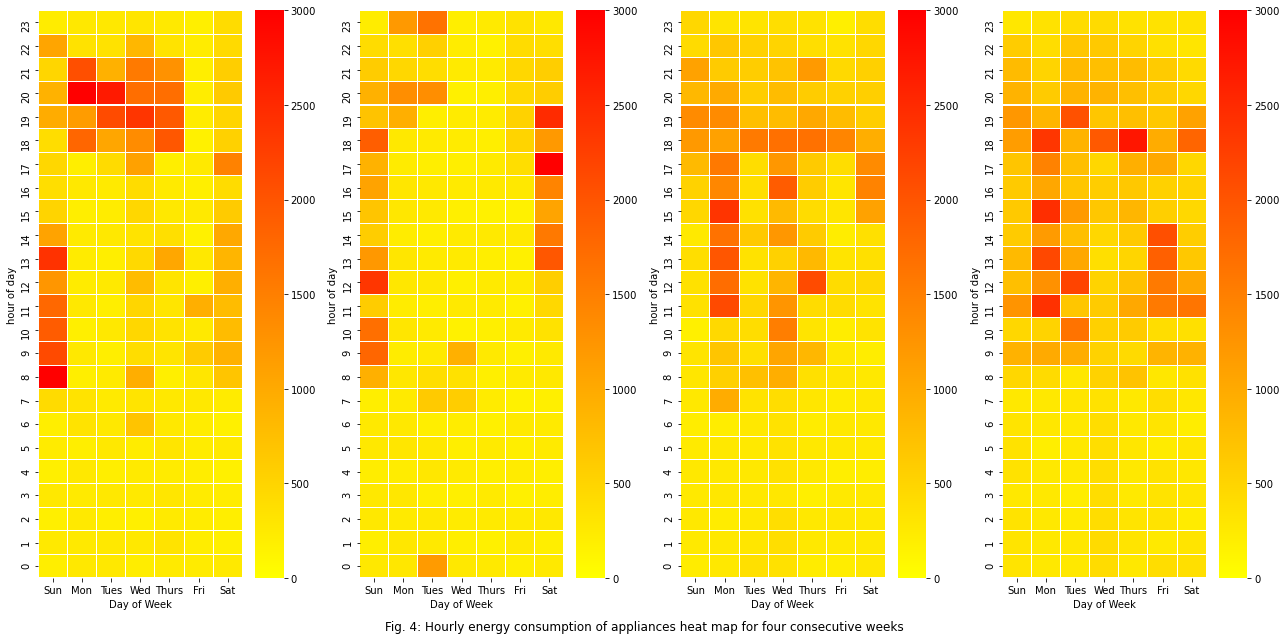

In [22]:
fig, axes = plt.subplots(ncols=4, figsize=(18,9))

# Define Ticks
Days = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']

# Use loop to plot heat map for 4 consecutive weeks
for i, ax in zip(range(1,5), axes.flatten()):
    sns.heatmap(data=full.loc[i+2], xticklabels=Days, yticklabels=True, linewidths=.01, cmap='autumn_r', vmin=0, vmax=3000, ax=ax).invert_yaxis()
    ax.set(xlabel='Day of Week', ylabel='hour of day')

fig.suptitle('Fig. 4: Hourly energy consumption of appliances heat map for four consecutive weeks', y=0)
fig.tight_layout()
plt.show()

**Comment:**
* The heat maps indicates a significant time effect on the energy consumption pattern. 
* The energy usage starts to rise from 7am in the morning (the beginning of daily activities), stays high around noon, and then surges again around 6pm to 8pm (the peak of evening activities).
* There is no obvious trend in terms of different days of the week. The energy load is observed to increase significantly on some days and stay low throughout some other days.

## Part 2: Modelling

### Regression
1. Multiple linear regression - evaluated via RMSE, R2, MAE, MAPE
2. Residuals vs. Appliances (Wh) for lm model scatterplot

In [23]:
train = pd.get_dummies(train, columns=['WeekStatus', 'Day_of_week'], dtype=float)
test = pd.get_dummies(test, columns=['WeekStatus', 'Day_of_week'], dtype=float)
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,61200,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,61800,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,62400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,63600,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,64200,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Drop columns that are not used in the article
X_train = train.drop(['date', 'Appliances', 'rv1', 'rv2'], axis=1)
y_train = train['Appliances']
X_test = test.drop(['date', 'Appliances', 'rv1', 'rv2'], axis=1)
y_test = test['Appliances']
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (14803, 35)
y_train: (14803,)
X_test: (4932, 35)
y_test: (4932,)


In [25]:
# Check the selected columns for modelling
feature_cols = X_train.columns
feature_cols

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM',
       'WeekStatus_Weekday', 'WeekStatus_Weekend', 'Day_of_week_Friday',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday'],
      dtype='object')

In [26]:
# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
# Modelling
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=35) 
selector = selector.fit(X_train, y_train) # fit the model in training set
    
supp = selector.get_support() # get the selected features

y_pred_train = selector.predict(X_train) # predict on train set
y_pred_test = selector.predict(X_test)  # predict on test set

# Create model performance table
rows = []
rows.append(["Linear Regression", "train", feature_cols[supp], mean_squared_error(y_train, y_pred_train, squared=False), 
             r2_score(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train), 
             mean_absolute_percentage_error(y_train, y_pred_train)])
rows.append(["Linear Regression", "test", feature_cols[supp], mean_squared_error(y_test, y_pred_test, squared=False), 
             r2_score(y_test, y_pred_test), mean_absolute_error(y_test, y_pred_test), 
             mean_absolute_percentage_error(y_test, y_pred_test)])

performance = pd.DataFrame(rows, columns=['Method', 'Set', 'Paramenters/Features', 'RMSE', 'R2', 'MAE', 'MAPE%'])
performance

,Method,Set,Paramenters/Features,RMSE,R2,MAE,MAPE%
0,Linear Regression,train,"Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', '...",93.208185,0.178298,53.134135,61.320901
1,Linear Regression,test,"Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', '...",93.176076,0.159014,51.974536,59.935428


**Comment:**
* From the metric scores, it is indicated that this linear model delivers poor prediction performances on both training and testing sets.
* The metric grades are quite similar for both training and testing sets.
* The RMSE scores are too high (over 93) while the R Squared scores are very far from 1.

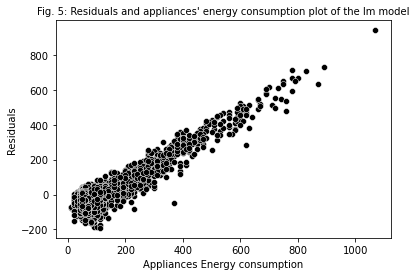

In [28]:
# Calculate residuals = actual value - predicted value
residuals = y_test - y_pred_test

# Plot residuals vs. appliance (Wh) for linear regression
sns.scatterplot(x=test.Appliances, y=residuals, color="black", marker = 'o')
plt.xlabel("Appliances Energy consumption")
plt.ylabel("Residuals")
plt.title("Fig. 5: Residuals and appliances' energy consumption plot of the lm model", size=10)
plt.show()

**Comment:** The residuals are not normally distributed around horizontal axis.

### RMSE using the RFE algorithm.

Optimal number of features : 22


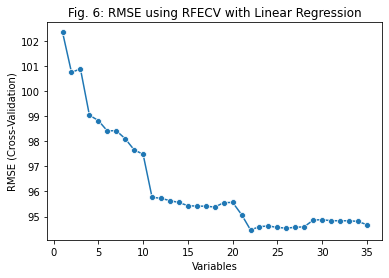

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=StratifiedKFold(10), 
              scoring='neg_root_mean_squared_error', min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features :", rfecv.n_features_)

# Plot number of features VS. cross-validation scores
sns.lineplot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), 
             (-rfecv.grid_scores_), marker='o')

plt.xlabel("Variables")
plt.ylabel("RMSE (Cross-Validation)")
plt.title("Fig. 6: RMSE using RFECV with Linear Regression")
plt.show()

**Comment:**
1. Execution:
    * Linear regression is used instead of Random Forest as adopted by the paper.
    * Negated (negative) RMSE is the default scoring function by sklearn.
    * The model is trained with 10 fold, similar to the paper
2. Result: 
    * The above differences results in a different RFE curve and the optimal number of features being 22 as compared to 34 in the paper.

## Conclusion

#### Overview of energy usage data
The energy consumption distribution over time shows a high variability of energy use among different hours and days. The energy load varies from 10Wh to 1080Wh with a median value of 60Wh.

#### Time as the most important predictor
From the household energy usage analysis, it is strongly suggested that time factor has a significant impact on the energy consumption. This is evidenced in the energy consumption pattern on the four-consecutive-week heat maps. Furthermore, according to the first pairs plot (Fig. 3.1), the highest correlation (0.22) is between appliances' consumption and NSM (i.e. the number of seconds from midnight). Thus, time records should be one of the most important inputs to predict the appliances' energy usage.

#### Other variables
In general, the energy consumption shows positive correlations with temperatures and negative correlations with humidity levels. Considering the ranking of correlation, data from the kitchen, laundry room, living room and bathrooms can be more relevant to the prediction model (perhaps due to having more appliances of common use). Information gathered from other rooms and outdoors, however, are still helpful in the prediction. Wind speed & pressure are also two important inputs for prediction. Air pressure can impact weather factors in general, and particularly, wind speed, humidity and temperatures in our data set. Finally, light has the second highest correlation (0.20) with appliances despite being regarded as a lesser predictor by the paper.

#### Poor performance from linear regression model
The evaluation metric scores of the linear model indicate that the model is not doing well in predicting on both the training and testing sets. The residuals' scatter plot points out that the validity assumption for the model has failed as the residuals are not normally distributed around zero (or the horizontal axis). Additionally, RFECV algorithm with RMSE scoring suggests 22 as the optimal number of features for the linear model.

## Reference
Candanedo, LM, Feldheim, V & Deramaix, D 2017, 'Data driven prediction models of energy use of appliances in a low-energy house', *Energy and Buildings*, vol. 140, pp. 81-97.